Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import show, rcParams
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [58]:
df['Fraud'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


## EDA

In [59]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Fraud            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [61]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Fraud              0
dtype: int64

In [62]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

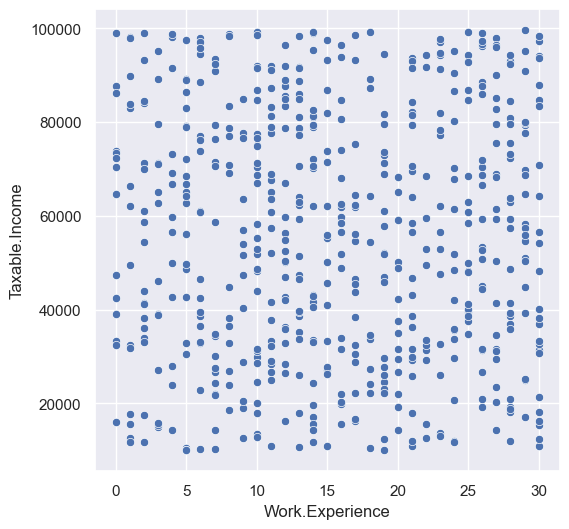

In [63]:
sns.set(rc={'figure.figsize': (6, 6), 'figure.dpi': 100})
sns.scatterplot(x=df['Work.Experience'], y=df['Taxable.Income'])

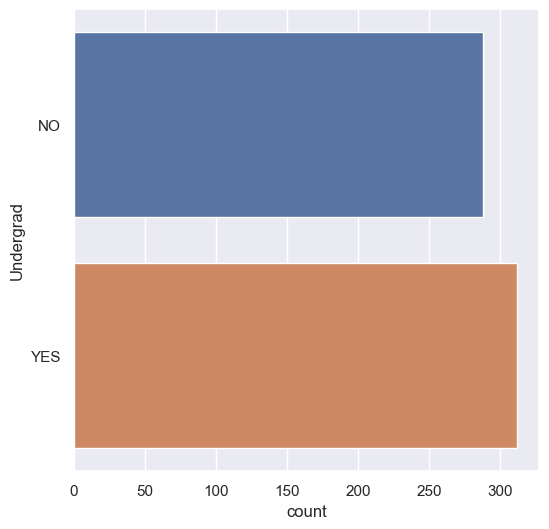

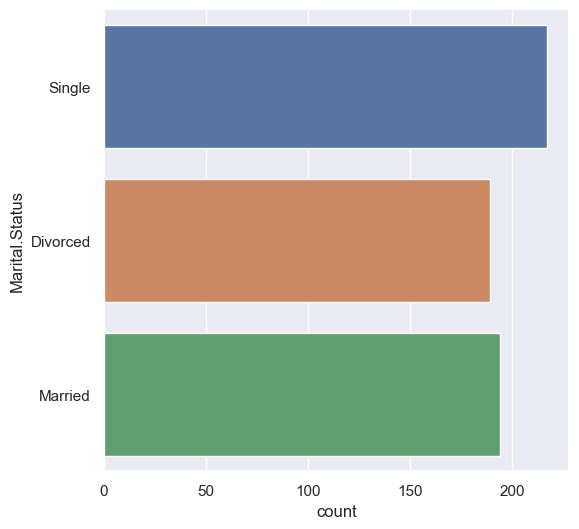

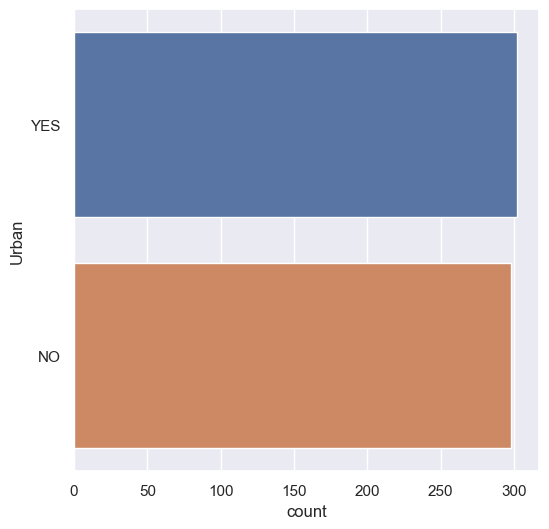

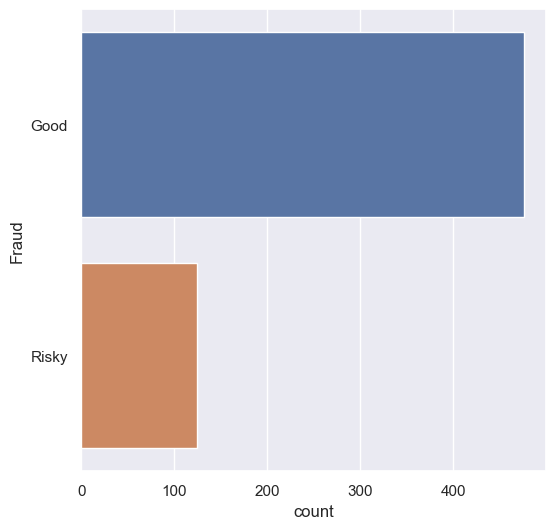

In [64]:
cat_cols = df.select_dtypes(object).columns
for col in cat_cols:
    sns.countplot(y=df[col])
    show()


## Encoding

In [65]:
x = df.iloc[:, [0, 1, 3, 4, 5]]
y = df.iloc[:, -1]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [66]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Fraud, Length: 600, dtype: object

In [67]:
oe = OrdinalEncoder()
le = LabelEncoder()
cat_cols = x.select_dtypes(object).columns
x[cat_cols] = oe.fit_transform(x[cat_cols])
y = le.fit_transform(y)

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,50047,10,1.0
1,1.0,0.0,134075,18,1.0
2,0.0,1.0,160205,30,1.0
3,1.0,2.0,193264,15,1.0
4,0.0,1.0,27533,28,0.0
...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0
596,1.0,0.0,55369,2,1.0
597,0.0,0.0,154058,0,1.0
598,1.0,1.0,180083,17,0.0


## Standardization

In [70]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


## Model Building using C5.0

In [71]:
xtrain, xtest , ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [72]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       144
           1       0.00      0.00      0.00        36

    accuracy                           0.78       180
   macro avg       0.40      0.49      0.44       180
weighted avg       0.64      0.78      0.70       180



In [73]:
print("Training Accuracy:", dt.score(xtrain, ytrain))
print("Testing accuracy:", dt.score(xtest, ytest))

Training Accuracy: 0.7928571428571428
Testing accuracy: 0.7833333333333333


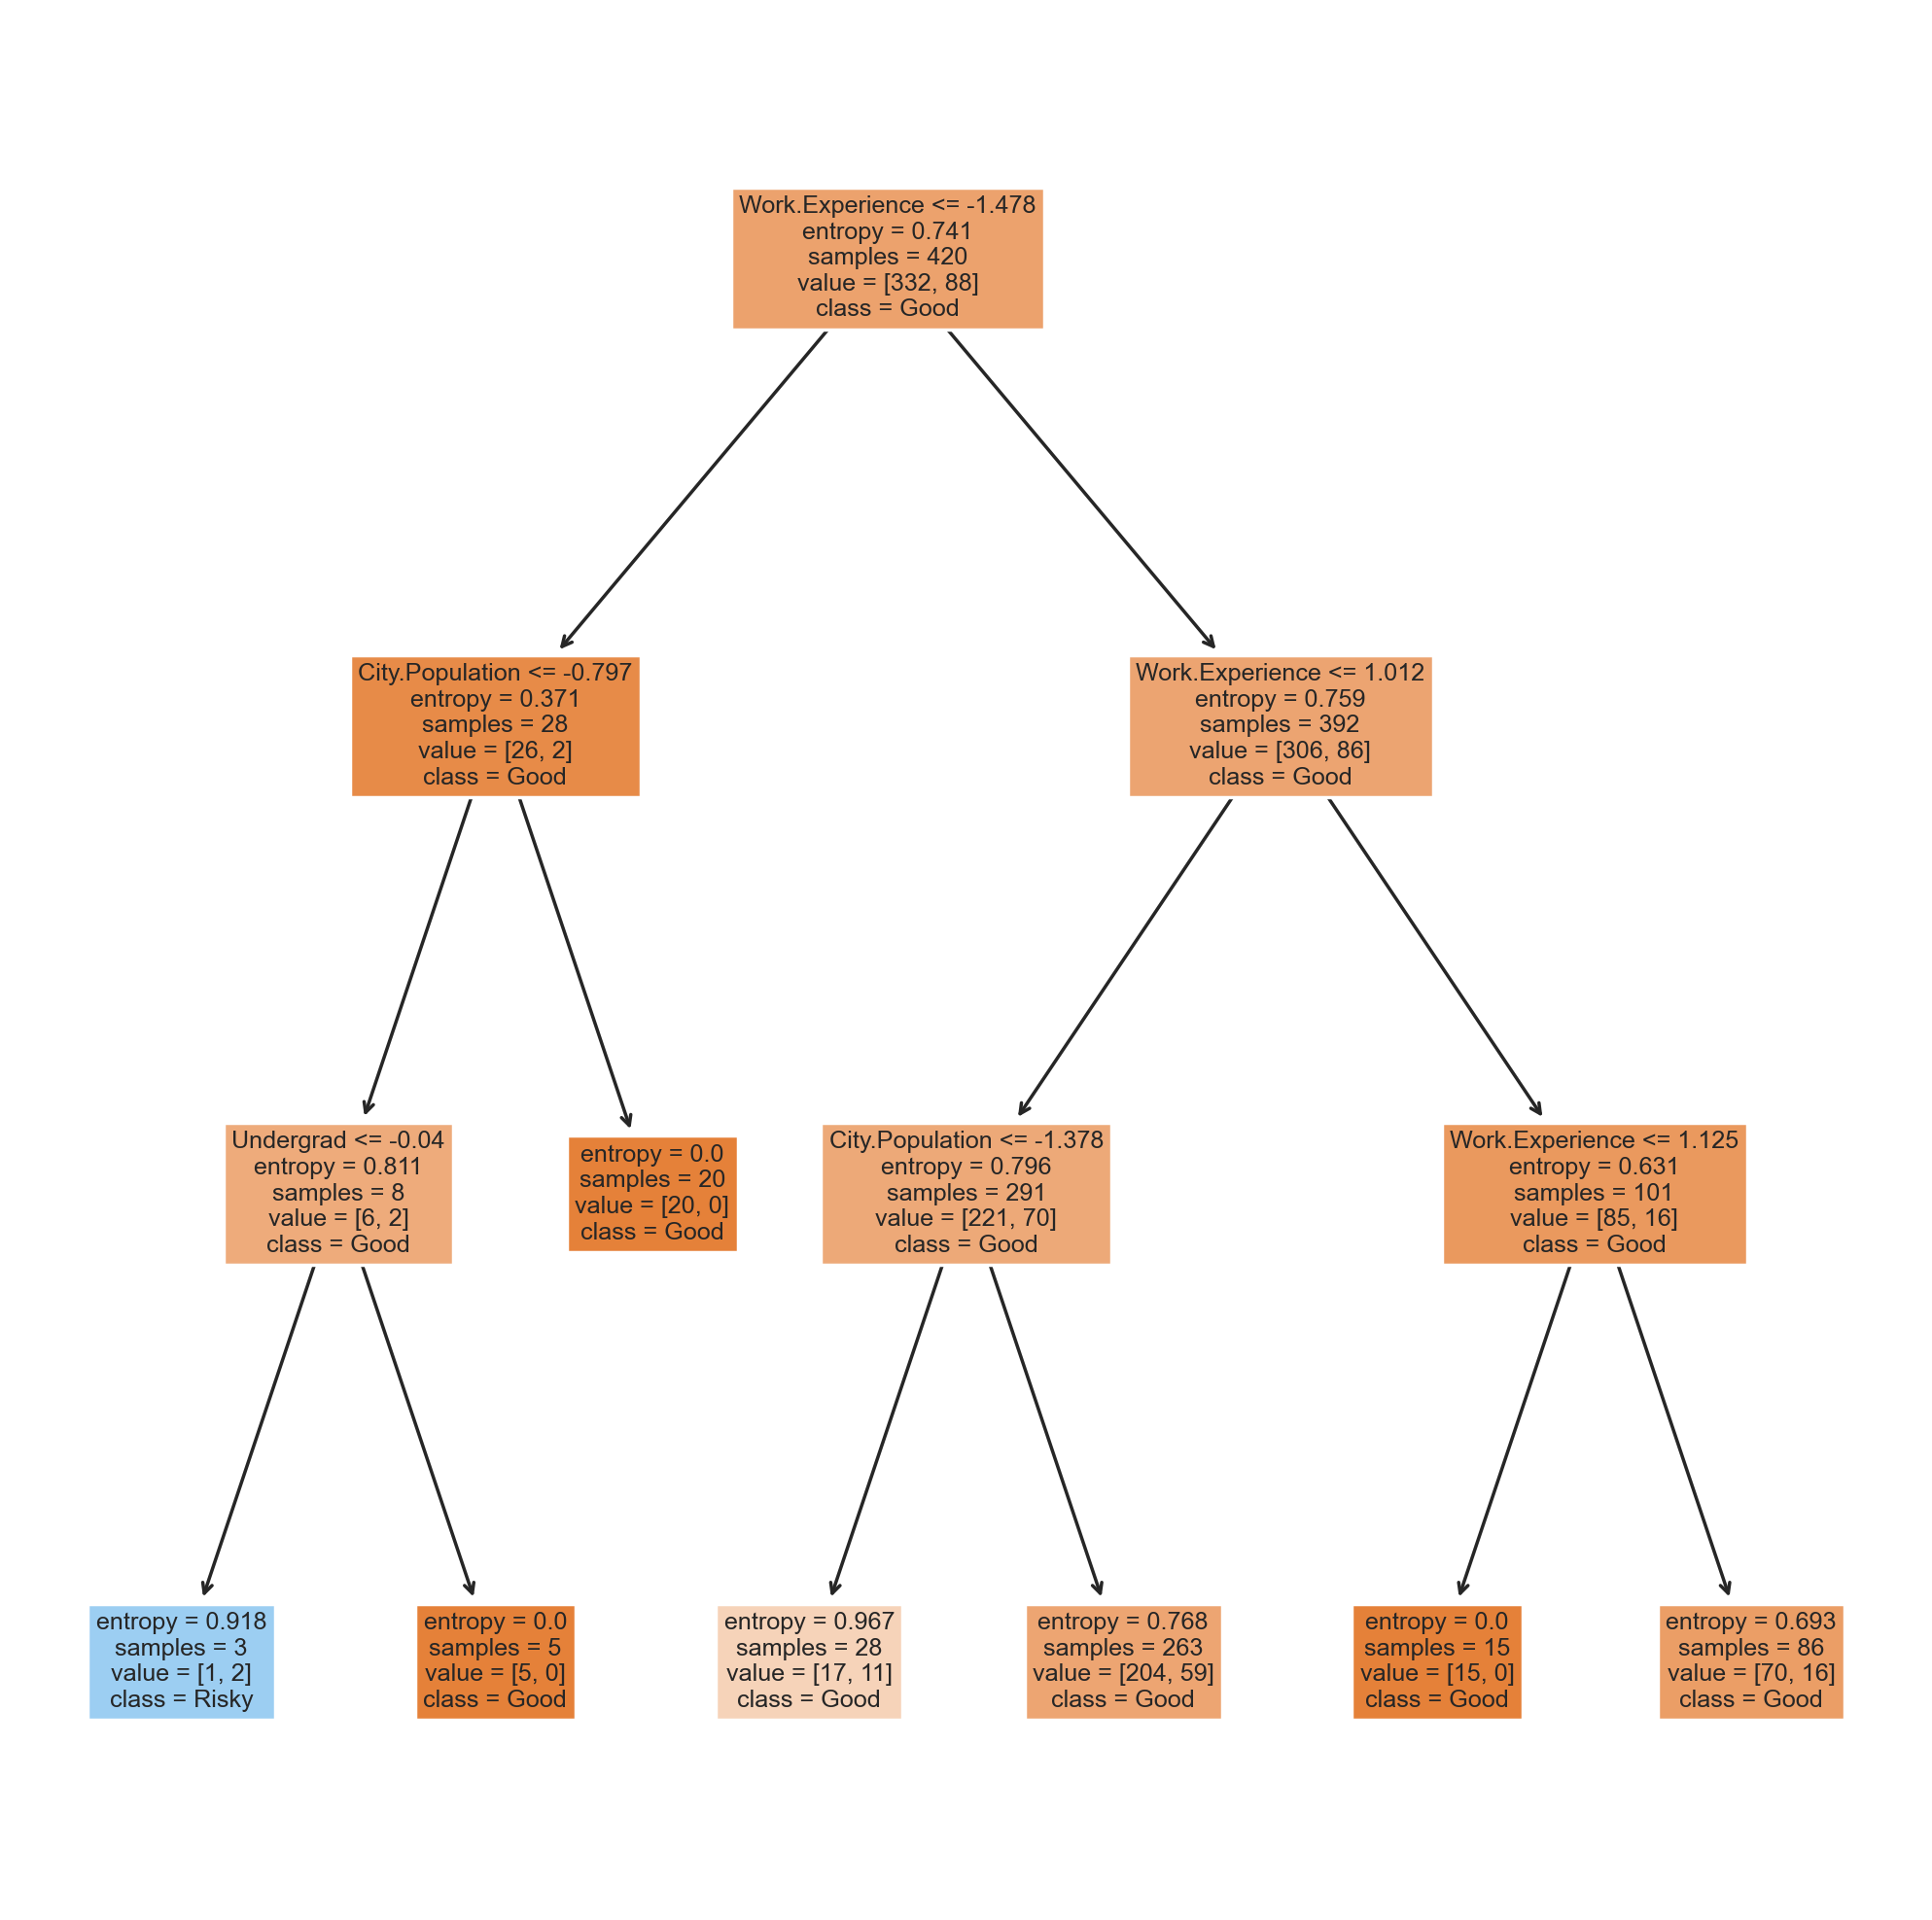

In [74]:
sns.set(rc={'figure.figsize': (10, 10), 'figure.dpi': 250})
fig = tree.plot_tree(dt, feature_names=x.columns, class_names=df['Fraud'].unique(), filled=True)

## Model Building using CART

In [75]:
dt =DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



In [76]:
print("Training Accuracy:", dt.score(xtrain, ytrain))
print("Testing accuracy:", dt.score(xtest, ytest))

Training Accuracy: 0.7952380952380952
Testing accuracy: 0.8


[Text(0.5, 0.875, 'Work.Experience <= -1.025\ngini = 0.331\nsamples = 420\nvalue = [332, 88]\nclass = Good'),
 Text(0.25, 0.625, 'City.Population <= 1.703\ngini = 0.23\nsamples = 83\nvalue = [72, 11]\nclass = Good'),
 Text(0.125, 0.375, 'City.Population <= 0.619\ngini = 0.202\nsamples = 79\nvalue = [70, 9]\nclass = Good'),
 Text(0.0625, 0.125, 'gini = 0.255\nsamples = 60\nvalue = [51, 9]\nclass = Good'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Good'),
 Text(0.375, 0.375, 'City.Population <= 1.756\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Good'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Risky'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Good'),
 Text(0.75, 0.625, 'Work.Experience <= 1.012\ngini = 0.353\nsamples = 337\nvalue = [260, 77]\nclass = Good'),
 Text(0.625, 0.375, 'City.Population <= -1.27\ngini = 0.383\nsamples = 236\nvalue = [175, 61]\nclass = Good'),
 Text(0.5625, 0.125, 'gini 

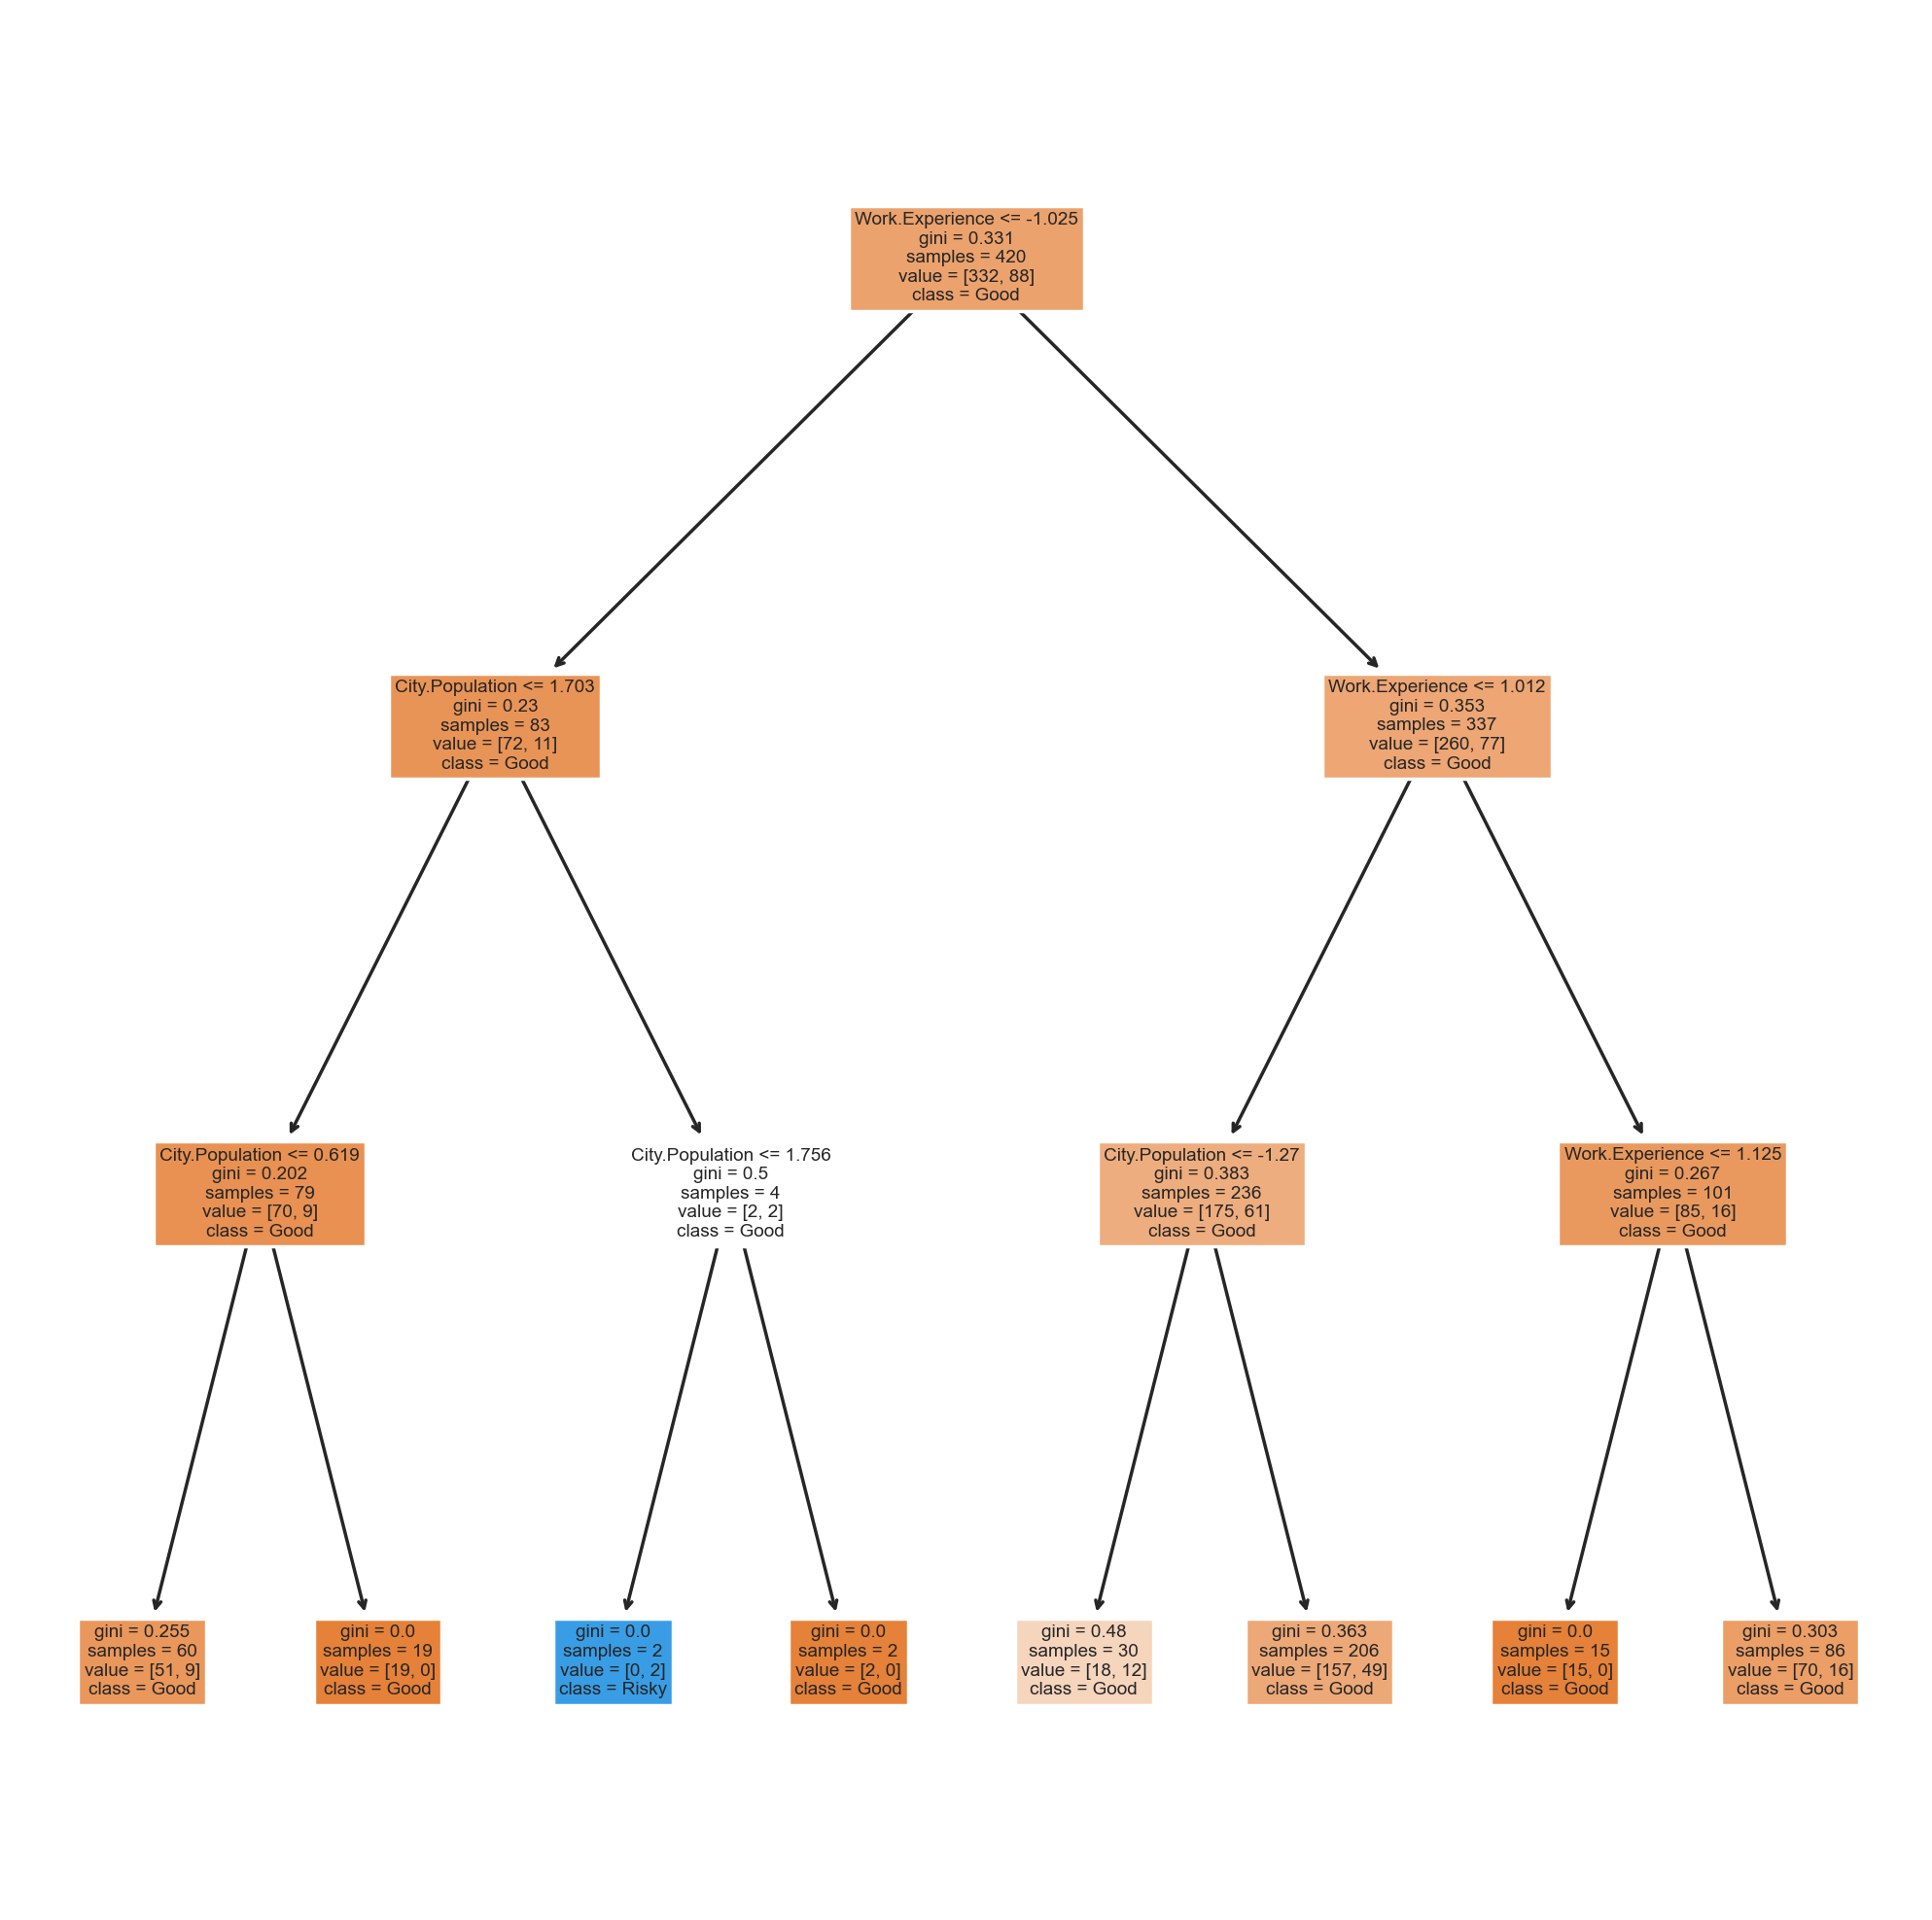

In [77]:
tree.plot_tree(dt, feature_names=x.columns, class_names=df['Fraud'].unique(), filled=True)